<a href="https://colab.research.google.com/github/AnkammaMaddineni/Maddineni_INFO5502_Summer2022/blob/main/lab_assignment_08_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Eighth Lab-assignment (08/09/2022 11:59'AM' - 08/12/2022 11:59PM, 50 points in total)

The purpose of this assignment is to practice different Hypothesis Testing and annotation quality evaluation.

### Question 1 (10 points) 

During the 1980s, the general consensus is that about 5% of the nation’s children had autism. Some claimed that increases certain chemicals in the environment has led to an increase in autism. 

(1) Write an appropriate hypothesis test for this situation (5 points).  

(2) Give an appropriate test for this hypothesis, stating what are the necessary conditions for performing the test (5 points). 

(3) A recent study examined 384 children and found that 46 showed signs of autism. Perform a test of the hypothesis and state the p-value (5 points). 

In [16]:
# You answer here
'''
We call null hypothesis as H0 and alternate hypothesis as H1
H0: Percentage of children affected with autism is 5% (proportion1 = proportion2)
H1: Percentage of children affected with autism is greater than 5% (proportion1 < proportion2)

For null hypothesis we are asuming that in both samples the percentage of children affected is equal i.e., 5%
For alternate hypothesis the percentage increases
'''


'\nWe call null hypothesis as H0 and alternate hypothesis as H1\nH0: Percentage of children affected with autism is 5% (proportion1 = proportion2)\nH1: Percentage of children affected with autism is greater than 5% (proportion1 < proportion2)\n\nFor null hypothesis we are asuming that in both samples the percentage of children affected is equal i.e., 5%\nFor alternate hypothesis the percentage increases\n'

In [17]:
'''
Since the sample size is grater than 30, Z_test is the appropriate test for this hypothesis.

'''

'\nSince the sample size is grater than 30, Z_test is the appropriate test for this hypothesis.\n\n'

In [20]:
# your code here

from statsmodels.stats.proportion import proportions_ztest
import numpy as np

sample_affected = np.array([5, 46])
sample_size = np.array([100, 384])
(z_test, p_value) = proportions_ztest(sample_affected, sample_size, alternative='smaller')
print((z_test, p_value))
#0.05 is taken as standard p_value
if p_value<0.05:
    print("We reject null hypothesis")
else:
    print("We accept null hypothesis")


(-2.02470999349148, 0.021448575928237536)
We reject null hypothesis


### Question 2 (10 points) 
In this problem,we will examine the sugar content of several national brands of cereals, here measured as a percentage of weight.

![assignmen_9.png](attachment:assignmen_9.png)

(1) Give a summary of these two datasets (5 points). 

(2) Create side-by-side boxplots and interpret what you see (5 points). 

(3) Use python to create a 95% confidence interval for the difference in mean sugar content and explain your result (5 points). 

In [23]:
# You answer here

#Given dataset
children = [40.3, 55.0, 45.7, 43.3, 50.3, 45.9, 53.5, 43.0, 44.2, 44.0, 
            33.6, 55.1, 48.8, 50.4, 37.8, 60.3, 46.6, 47.4, 44.0]

adult = [20.0, 30.2, 2.2, 7.5, 4.4, 22.2, 16.6, 14.5, 21.4, 3.3, 10.0, 1.0, 4.4, 1.3, 8.1,
         6.6, 7.8, 10.6, 16.2, 14.5, 4.1, 15.8, 4.1, 2.4, 3.5, 8.5, 4.7, 18.4]

import numpy as np

# Question 1. (Summary of datasets)
print("Mean of children dataset", np.mean(children))
print("Std.Deviation of children dataset", np.std(children))
print("Number of elements in children dataset", len(children))
print()
print("Mean of adult dataset", np.mean(adult))
print("Std.Deviation of adult dataset", np.std(adult))
print("Number of elements in adult dataset", len(adult))


Mean of children dataset 46.800000000000004
Std.Deviation of children dataset 6.24718884147523
Number of elements in children dataset 19

Mean of adult dataset 10.153571428571427
Std.Deviation of adult dataset 7.475220118252474
Number of elements in adult dataset 28


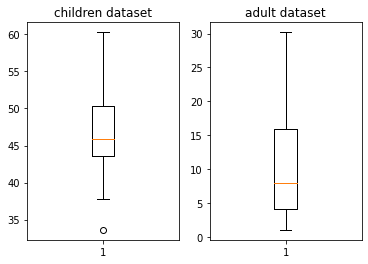

In [26]:
# your code here

# Question 2. (Creating boxplots)

import matplotlib.pyplot as plt

plt.subplot(1,2,1)
#1,2,1 represents rows, columns and plot number respectively
plt.boxplot(children)
plt.title("children dataset")

plt.subplot(1,2,2)
plt.boxplot(adult)
plt.title("adult dataset")
plt.show()



In [ ]:
'''
From the above boxplots:
There is an outlier in the children dataset
In both the plots the the upper half of data is more than the lower half
Interquartile range is more in adult dataset
Median is shown in the plot as yellow line
Upper whisker is longer in both the datasets which represents that the upper 25% values are larger

'''

In [32]:
# Question 3.

from scipy import stats
Given_confidence_level = 0.95

confidence_interval_for_children_dataset = stats.t.interval(alpha=0.95,
              df=len(children)-1,
              loc=np.mean(children), 
              scale=stats.sem(children))
print("confidence interval for children dataset:", confidence_interval_for_children_dataset)

confidence_interval_for_adult_dataset = stats.t.interval(alpha=0.95,
              df=len(adult)-1,
              loc=np.mean(adult), 
              scale=stats.sem(adult))
print("confidence interval for adult dataset:", confidence_interval_for_adult_dataset)

confidence interval for children dataset: (43.706441602172454, 49.893558397827555)
confidence interval for adult dataset: (7.201794131005471, 13.105348726137382)


In [ ]:
'''
It shows that for both of the datasets variation in the estimate is almost similar.
The estimate will fall in that 6 point difference in both the datasets
'''

### Question 3 (30 points) 

Cohen's kappa coefficient (κ) is a statistic that is used to measure inter-rater reliability (and also intra-rater reliability) for qualitative (categorical) items. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance. There is controversy surrounding Cohen's kappa due to the difficulty in interpreting indices of agreement. Some researchers have suggested that it is conceptually simpler to evaluate disagreement between items.

A more detailed description of Kappa agreement can be found on wikipedia: https://en.wikipedia.org/wiki/Cohen%27s_kappa

Here is the dataset we created for a text classification task: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/lab08-dataset.csv

The last three columns indicate the annotation on the same sentence by three students respectively. Based on this dataset, please calculate the Cohen's kappa and the Fleiss' kappa using their formulars (Python). Please don't use any existing packages for the implementation. 

In [4]:
# your code here

import pandas as pd
from sklearn.preprocessing import LabelEncoder

dataframe=pd.read_csv("https://raw.githubusercontent.com/suthapalliuday/INFO5502-Summer2022/main/datasets/lab08-dataset.csv")
dataframe.head()


,Title of Article,Contributions,Source,Annotation1,Annotation2,Annotation3,Year
0,The measurement of ÒinterdisciplinarityÓ and Ò...,"In this study, we discuss recent advances in t...",JASIST,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization,NaN
1,Innovation adoption: Broadcasting versus virality,broadcasting and virality have similar diffusi...,JASIST,Theory proposal\n,Theory proposal\n,Theory proposal\n,NaN
2,Discovering underlying sensations of human emo...,we report the results of our study on sensatio...,JASIST,Theory proposal\n,Algorithms/ Methods Construction or Optimization,Theory proposal\n,NaN
3,Discovering underlying sensations of human emo...,"in the second part of the paper, we define nov...",JASIST,Theory proposal\n,Theory proposal\n,Theory proposal\n,NaN
4,Discovering underlying sensations of human emo...,we design a method to classify texts into ones...,JASIST,Algorithms/ Methods Construction or Optimization,Model Construction or Optimization,Algorithms/ Methods Construction or Optimization,NaN


In [7]:
from sklearn.preprocessing import LabelEncoder as le

le = LabelEncoder()
le.fit(dataframe['Annotation1'])
dataframe_modify = dataframe[["Annotation1", "Annotation2", "Annotation3"]].apply(le.transform)
dataframe_modify.head()

,Annotation1,Annotation2,Annotation3
0,1,1,1
1,7,7,7
2,7,1,7
3,7,7,7
4,1,4,1


In [20]:
from sklearn.metrics import cohen_kappa_score

kappa_A1_A2 = cohen_kappa_score(list(dataframe['le_Annotation1'].values), list(dataframe['le_Annotation2'].values))
kappa_A2_A3 = cohen_kappa_score(list(dataframe['le_Annotation2'].values), list(dataframe['le_Annotation3'].values))
kappa_A1_A3 = cohen_kappa_score(list(dataframe['le_Annotation1'].values), list(dataframe['le_Annotation3'].values))

avg_score = (kappa_A1_A2 + kappa_A2_A3 + kappa_A1_A3)/3

print("Cohen's kappa score =", round(avg_score, 2))

Cohen's kappa score = 0.54


In [14]:
# When the score more the agreement between the students is high

# score 1 will be the strong agreement

# since the sccore is 0.54 the agreement is moderate

In [16]:
!pip install krippendorff

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import krippendorff

data = [list(dataframe['le_Annotation1'].values), list(dataframe['le_Annotation2'].values), list(dataframe['le_Annotation3'].values)]

fleiss_score = krippendorff.alpha(data)

print("Fleiss' kappa score =", round(fleiss_score, 2))

Fleiss' kappa score = 0.57
